# Ejercicios del Módulo 4

matplotlib y numpy

### Ejercicio de OOIP
Supongamos que queremos calcular un rango de valores para el petróleo original en sitio de un reservorio que estamos estudiando. Para ello podemos modelar la incerteza sobre los parámetros del reservorio como distribuciones de probabilidad. Recordemos que la expresión para el OOIP es la siguiente:
$$OOIP=\frac{Ah\phi S_{oi}}{B_{oi}}$$

Esta expresión permite estimar el OOIP en metros cúbicos, a condiciones de superficie. $\phi$ es la porosidad en fracción, $S_{oi}$ la saturación de petróleo original, también en fracción, $A$ es el área en metros cuadrados y $h$ es el espesor en metros. Por último $B_{oi}$ es el factor volumétrico.

Supongamos que el área y el factor volumétrico son constantes y conocidos:
* A= 1000000 m2
* $B_{oi}$ = 1.0

Queremos estimar valores de OOIP modelando la incerteza sobre la porosidad, la saturación de petróleo y el espesor del reservorio. Supongamos que esas variables siguen las siguientes distribuciones de probabilidad:
* Porosidad: distribución normal, con media 0.15 y std 0.03
* Espesor: distribución normal, con media 5m y std 0.5m
* Saturación de petróleo: distribución uniforme entre 0.1 y 0.4

Estimemos la incerteza en OOIP siguiendo los siguientes pasos:


1. Generar 10000 (diez mil) muestras de esas 3 variables y calcular otros tantos valores de OOIP usando la expresión de arriba.
2. Calcular la media y el desvio estándar del OOIP.
3. Verificar los valores mínimos y máximos ¿hay algún problema?
4. Usando la función *clip* corregir los valores de porosidad y espesor fuera de rangos razonables.
5. Recalcular la media y el desvio estándar 
6. Graficar el histograma.
7. Graficar la probabilidad acumulada ¿Cuáles son los valores p10, p50 y p90?

## Datos

In [55]:
#imports siempre primero
import numpy as np
import matplotlib.pyplot as plt

In [56]:
gen=np.random.default_rng(seed=1)
A=1000000.0
Bo=1.0
N=10000

In [57]:
#1
#Porosidad
poro=gen.normal(loc=0.15,scale=0.05,size=N)
#Espesor
h=gen.normal(loc=5.0,scale=0.5,size=N)
#Saturacion
So=(0.4-0.1)*gen.random(size=N)+0.1
OOIP=A*h*poro*So/Bo

In [58]:
#2
print('Valor medio de OOIP en metros cubicos {}'.format(np.around(OOIP.mean(),1)))
print('Desvio estándar de OOIP en metros cubicos {}'.format(np.around(OOIP.std(),1)))

Valor medio de OOIP en metros cubicos 186493.6
Desvio estándar de OOIP en metros cubicos 94579.7


In [59]:
#3
print('OOIP mínimo: {}'.format(OOIP.min()))
print('OOIP máximo: {}'.format(OOIP.max()))

OOIP mínimo: -40096.825240122635
OOIP máximo: 642101.9339856049


In [60]:
#4
poro=np.clip(poro,0.0,1.0)
h=np.clip(h,0.0,20.0)

In [61]:
#5
OOIP=A*h*poro*So/Bo
print('Valor medio de OOIP en metros cúbicos {}'.format(np.around(OOIP.mean(),1)))
print('Desvio estándar de OOIP en metros cúbicos {}'.format(np.around(OOIP.std(),1)))

Valor medio de OOIP en metros cúbicos 186514.7
Desvio estándar de OOIP en metros cúbicos 94535.3


## Gráficos con matplotlib

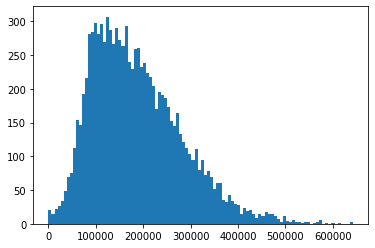

In [62]:
plt.hist(OOIP,bins=100)
plt.show()

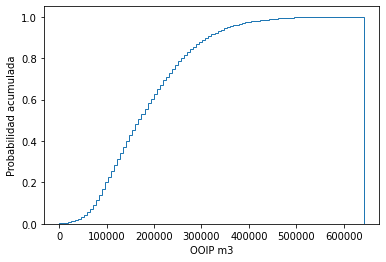

In [63]:
hx, hy, _ = plt.hist(OOIP, bins=100,density=True,cumulative=True,histtype='step')
plt.xlabel('OOIP m3')
plt.ylabel('Probabilidad acumulada')
plt.show()
#dx = hy[1] - hy[0]
#F1 = np.cumsum(hx)*dx
#plt.plot(hy[1:], F1)

In [64]:
#5
#hy donde el valor está por encima de 0.10 (p90 petrolero)
hy_p10=np.min(np.where(hx>=0.1))
p90=hy[hy_p10+1]

In [65]:
#hy donde el valor está por encima de 0.50 (p50 petrolero)
hy_p50=np.min(np.where(hx>=0.5))
p50=hy[hy_p50+1]

In [66]:
#hy donde el valor está por encima de 0.90 (p10 petrolero)
hy_p90=np.min(np.where(hx>=0.9))
p10=hy[hy_p90+1]

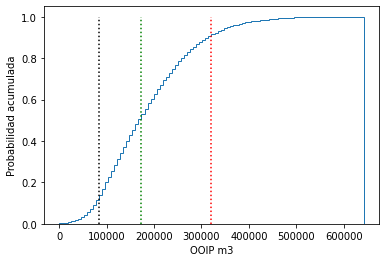

In [67]:
hx, hy, _ = plt.hist(OOIP, bins=100,density=True,cumulative=True,histtype='step')
plt.xlabel('OOIP m3')
plt.ylabel('Probabilidad acumulada')
plt.vlines(p10,0.0,1.0,color='r',linestyles='dotted')
plt.vlines(p50,0.0,1.0,color='g',linestyles='dotted')
plt.vlines(p90,0.0,1.0,color='k',linestyles='dotted')
plt.show()